In [2]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df = data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
legal_df = data[data['Class']==0]
illegal_df = data[data['Class']==1]

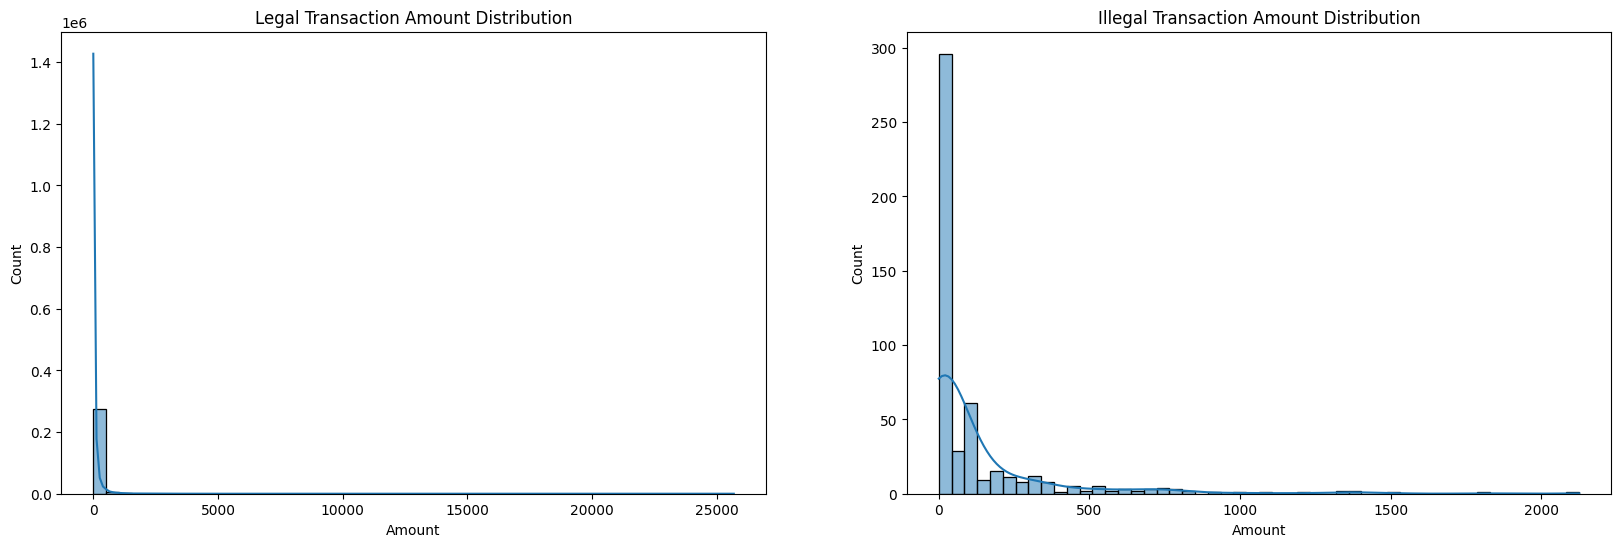

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(legal_df['Amount'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('Legal Transaction Amount Distribution')
sns.histplot(illegal_df['Amount'], bins=50, kde=True, ax=axs[1])
axs[1].set_title('Illegal Transaction Amount Distribution')
plt.show()



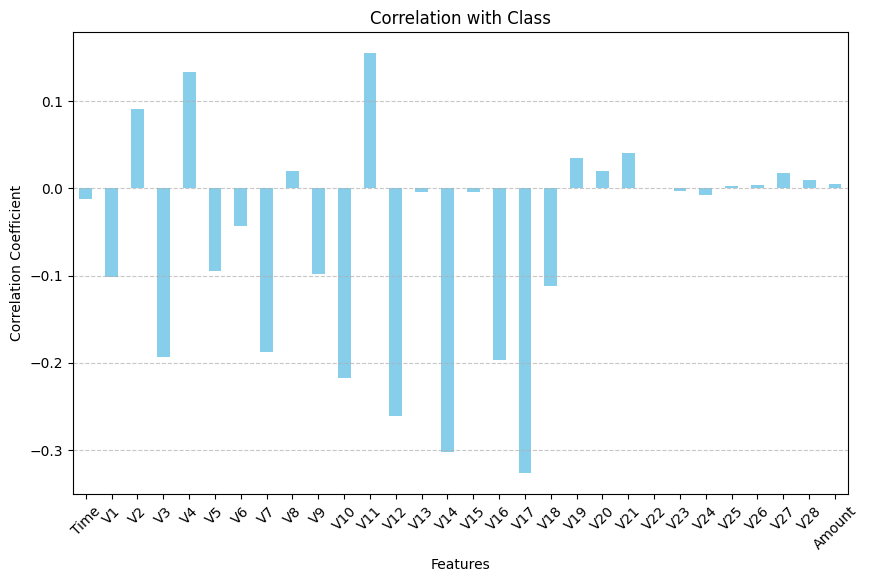

Correlation Coefficients with Class:
V2        0.091289
V4        0.133447
V8        0.019875
V11       0.154876
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64


In [ ]:
correlation_matrix = df.corr()
correlation_with_class = correlation_matrix['Class'].drop('Class')
plt.figure(figsize=(10, 6))
correlation_with_class.plot(kind='bar', color='skyblue')
plt.title('Correlation with Class')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Correlation Coefficients with Class:")
print(correlation_with_class[correlation_with_class > 0])


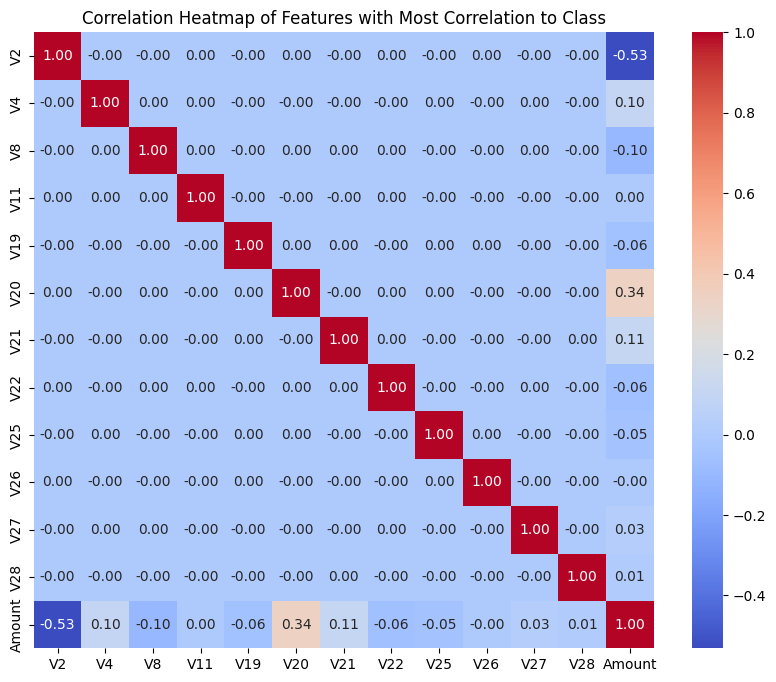

In [ ]:
correlation_matrix = df.corr()
correlation_with_class = correlation_matrix['Class'].drop('Class')
positive_correlation_features = correlation_with_class[correlation_with_class > 0].index.tolist()
correlation_matrix_filtered = correlation_matrix.loc[positive_correlation_features, positive_correlation_features]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features with Most Correlation to Class')
plt.show()

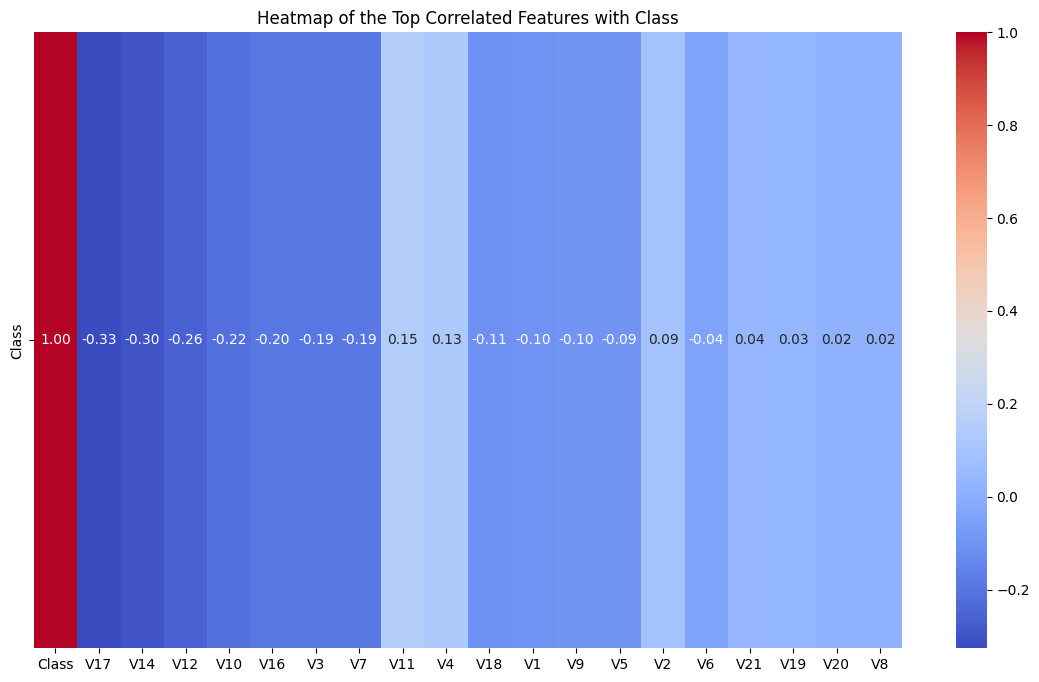

Class    1.000000
V17     -0.326481
V14     -0.302544
V12     -0.260593
V10     -0.216883
V16     -0.196539
V3      -0.192961
V7      -0.187257
V11      0.154876
V4       0.133447
V18     -0.111485
V1      -0.101347
V9      -0.097733
V5      -0.094974
V2       0.091289
V6      -0.043643
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
Name: Class, dtype: float64

In [ ]:
correlation_matrix = df.corr()

most_correlated_features = correlation_matrix['Class'].sort_values(key=abs, ascending=False)

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix.loc[['Class'], most_correlated_features.index[:20]], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of the Top Correlated Features with Class')
plt.show()

most_correlated_features.head(20)


In [ ]:
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#new derived columns
df['Time_Day'] = (Delta_Time.dt.components.days).astype('int')
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype('int')
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype('int')

In [ ]:
df.to_csv("Time_df.csv")

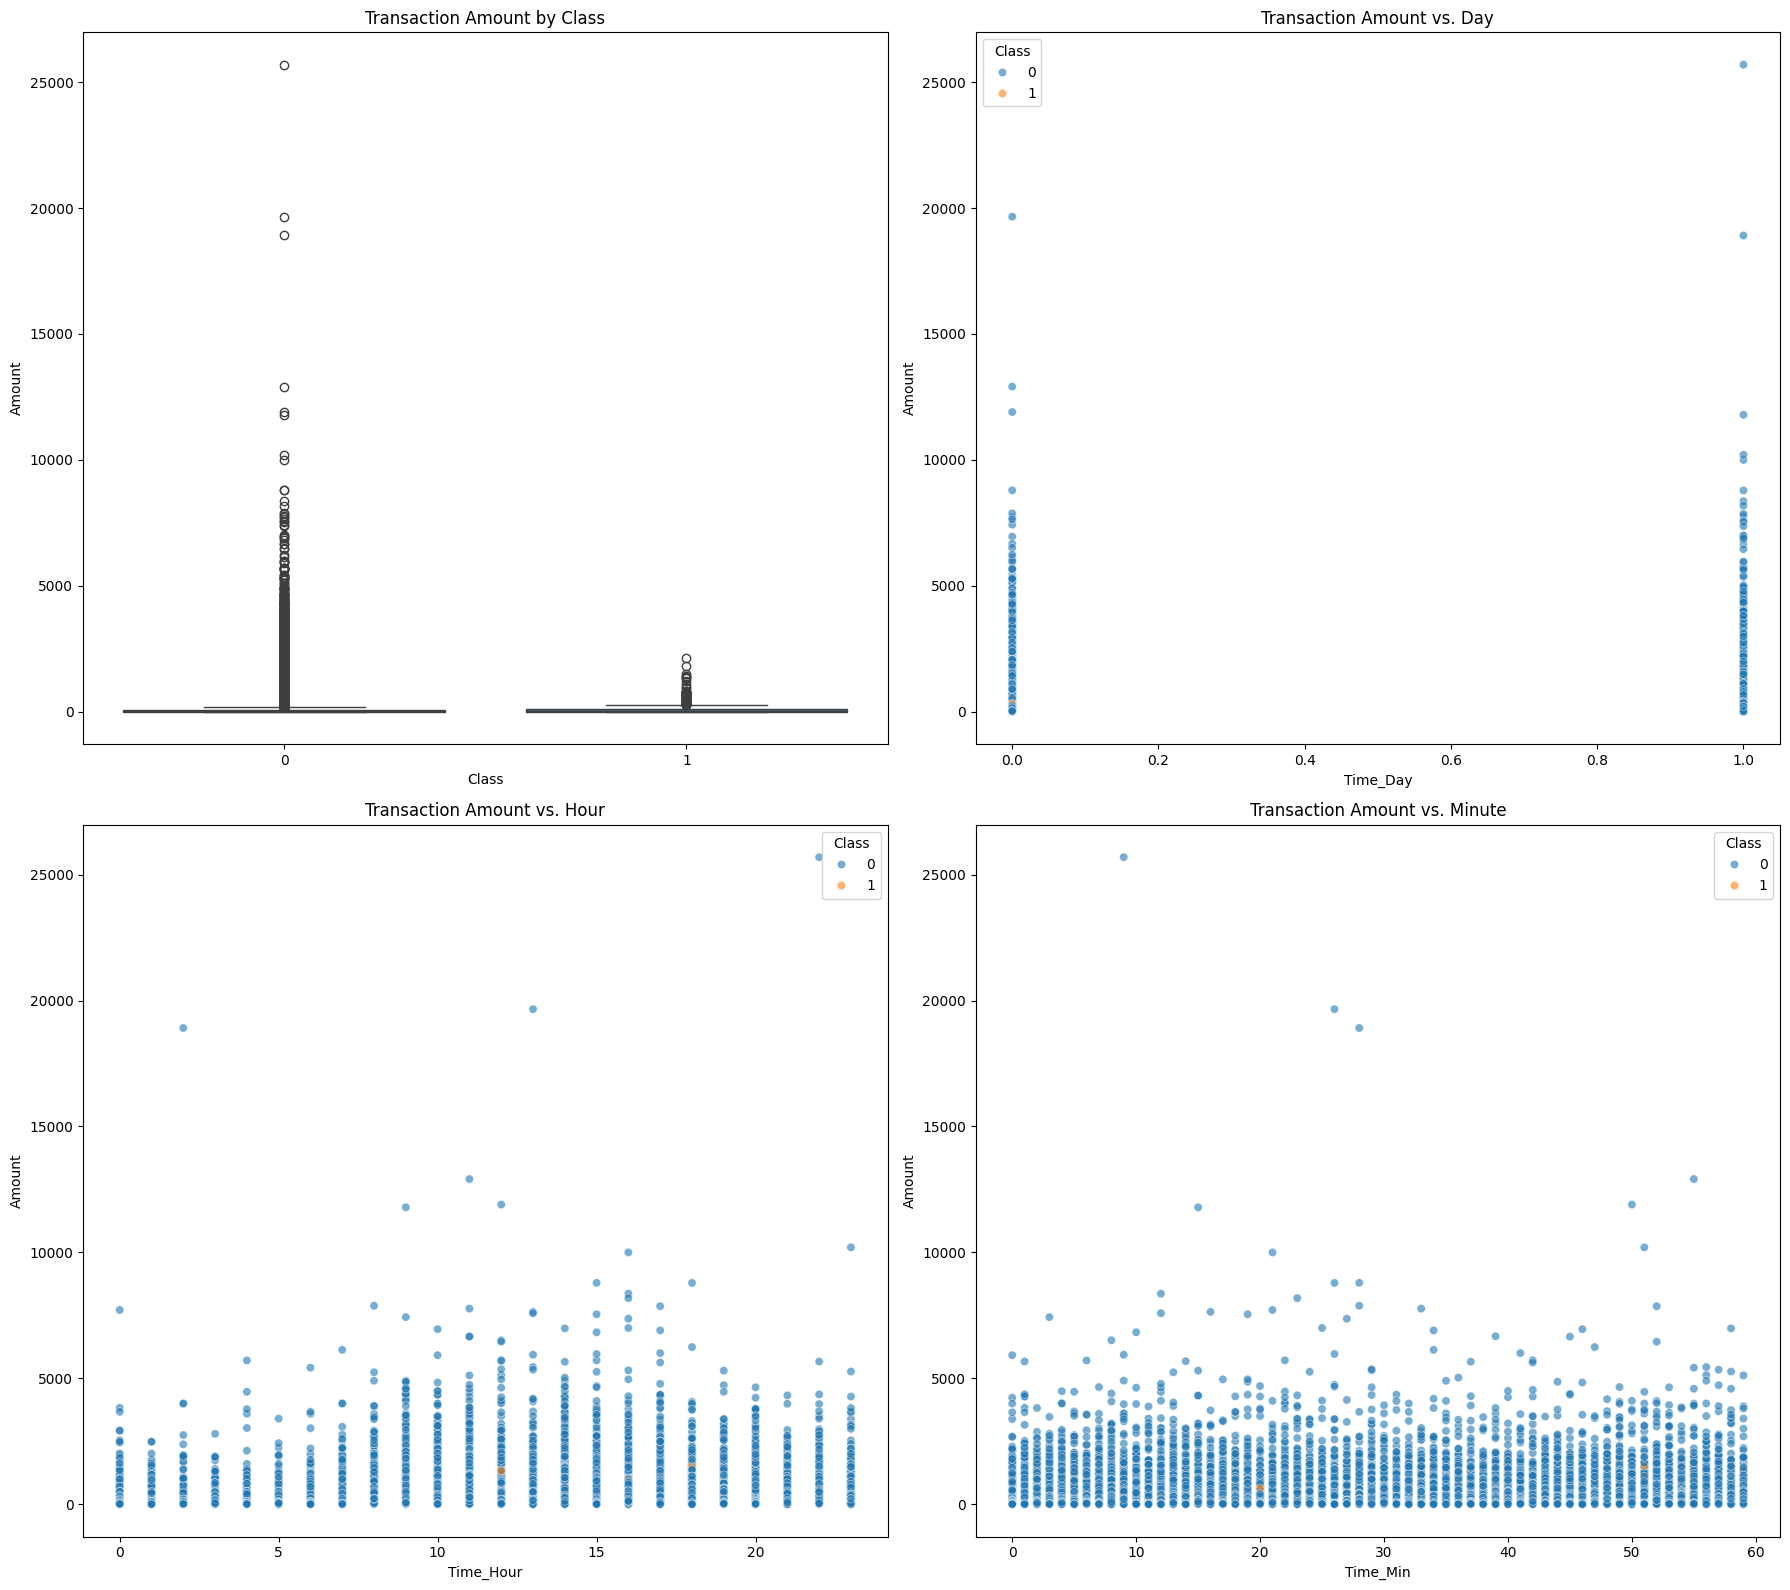

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [ ]:
plt.figure(figsize=(18, 16))

# Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')

# Time by Day vs Amount
plt.subplot(2, 2, 2)
sns.scatterplot(x='Time_Day', y='Amount', hue='Class', data=df, alpha=0.6)
plt.title('Transaction Amount vs. Day')

# Time by Hour vs Amount
plt.subplot(2, 2, 3)
sns.scatterplot(x='Time_Hour', y='Amount', hue='Class', data=df, alpha=0.6)
plt.title('Transaction Amount vs. Hour')

# Time by Minute vs Amount
plt.subplot(2, 2, 4)
sns.scatterplot(x='Time_Min', y='Amount', hue='Class', data=df, alpha=0.6)
plt.title('Transaction Amount vs. Minute')

plt.tight_layout()
plt.show()

amount_stats_by_class = df.groupby('Class')['Amount'].describe()
amount_stats_by_class


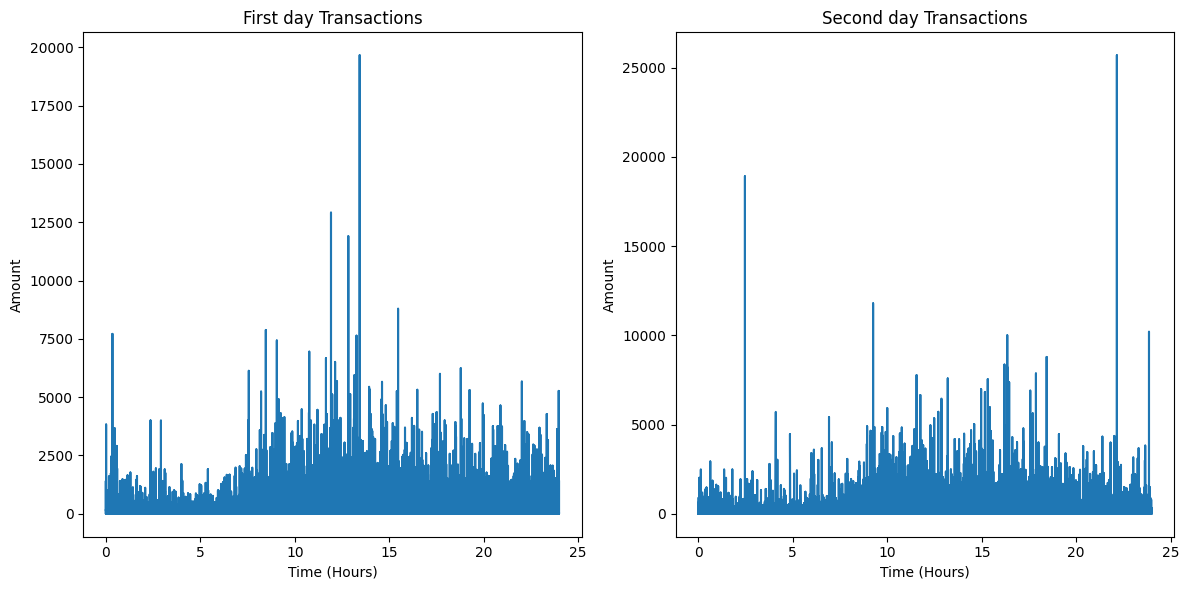

In [ ]:
firstday_df = df[df["Time_Day"] == 0]
second_day = df[df["Time_Day"] == 1]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1.plot(firstday_df['Time_Hour'] + firstday_df['Time_Min'] / 60, firstday_df['Amount'], label='Line 1')
ax1.set_title('First day Transactions')
ax1.set_xlabel('Time (Hours)')
ax1.set_ylabel('Amount')
ax2.plot(second_day['Time_Hour'] + second_day['Time_Min'] / 60, second_day['Amount'], label='Line 2')
ax2.set_title('Second day Transactions')
ax2.set_xlabel('Time (Hours)')
ax2.set_ylabel('Amount')
plt.tight_layout()
plt.show()

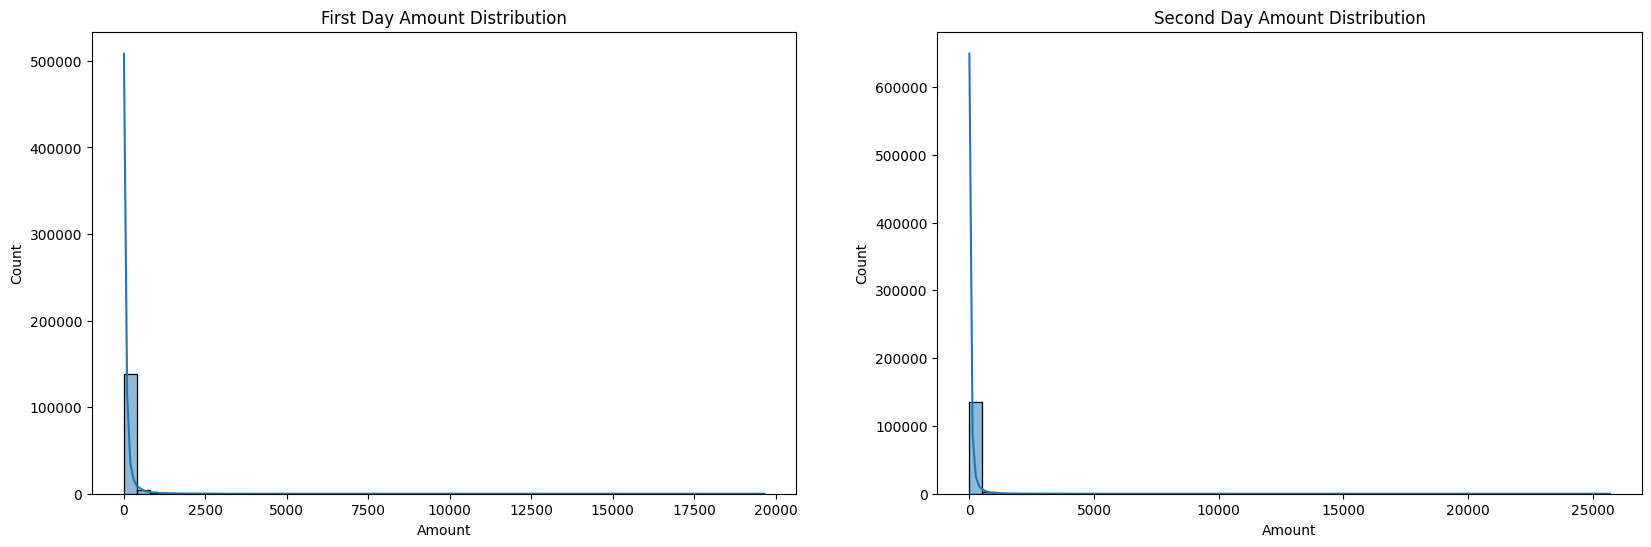

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(firstday_df['Amount'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('First Day Amount Distribution')
sns.histplot(second_day['Amount'], bins=50, kde=True, ax=axs[1])
axs[1].set_title('Second Day Amount Distribution')
plt.show()


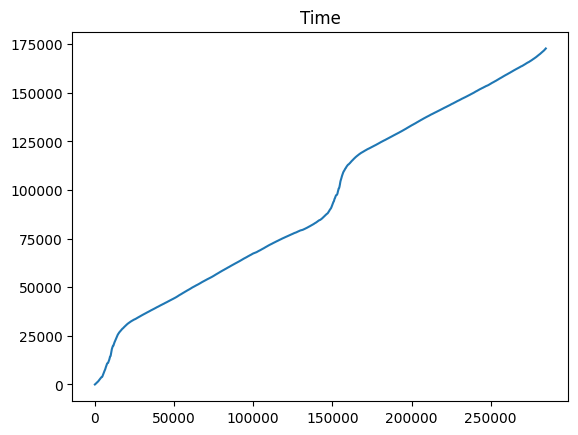

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


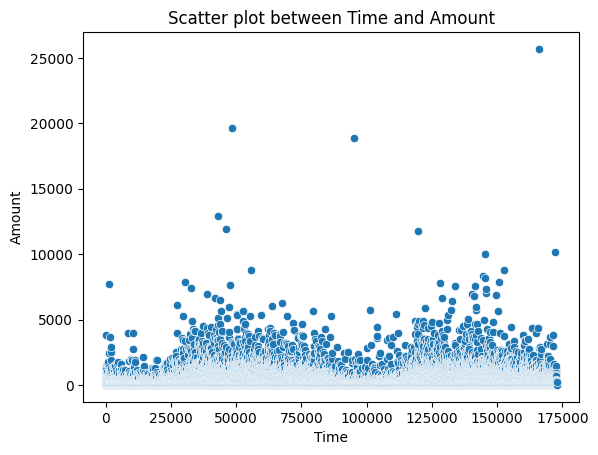

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


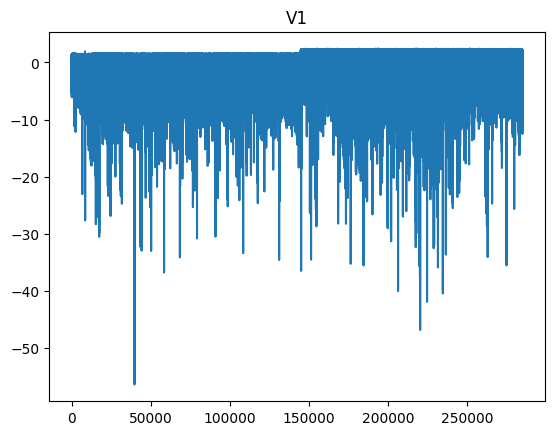

count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64


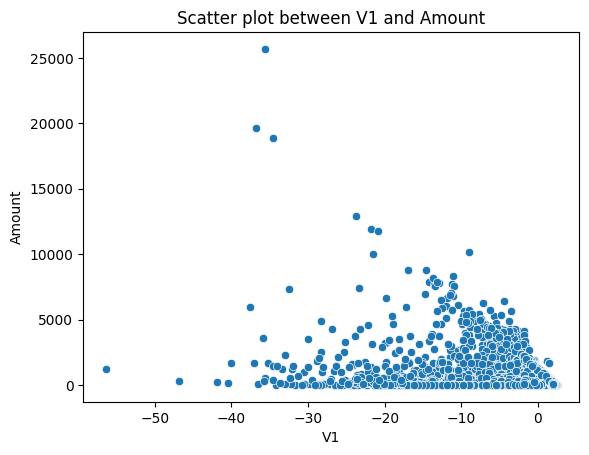

count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64


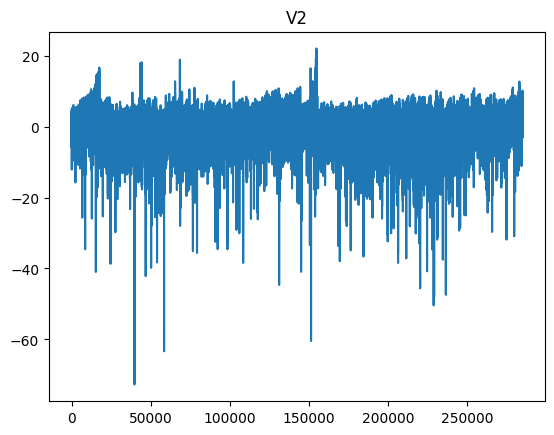

count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
max      2.205773e+01
Name: V2, dtype: float64


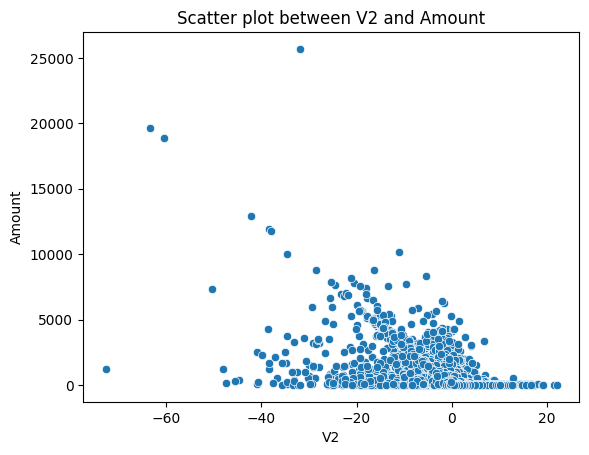

count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
max      2.205773e+01
Name: V2, dtype: float64


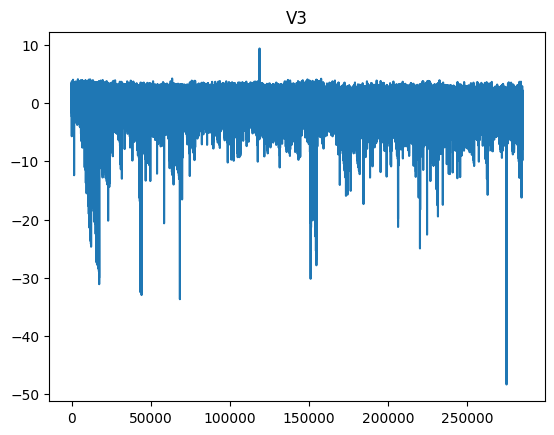

count    2.848070e+05
mean    -1.379537e-15
std      1.516255e+00
min     -4.832559e+01
25%     -8.903648e-01
50%      1.798463e-01
75%      1.027196e+00
max      9.382558e+00
Name: V3, dtype: float64


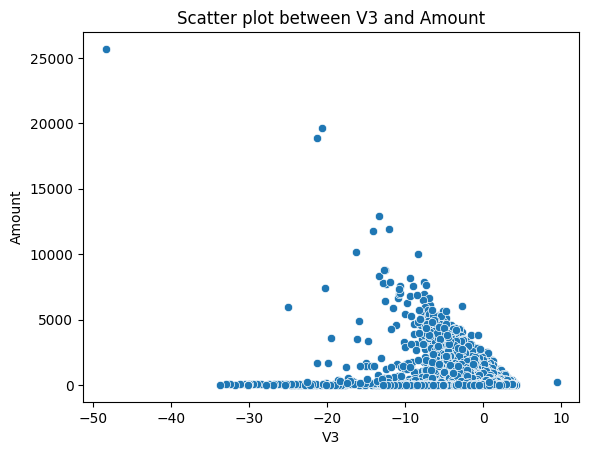

count    2.848070e+05
mean    -1.379537e-15
std      1.516255e+00
min     -4.832559e+01
25%     -8.903648e-01
50%      1.798463e-01
75%      1.027196e+00
max      9.382558e+00
Name: V3, dtype: float64


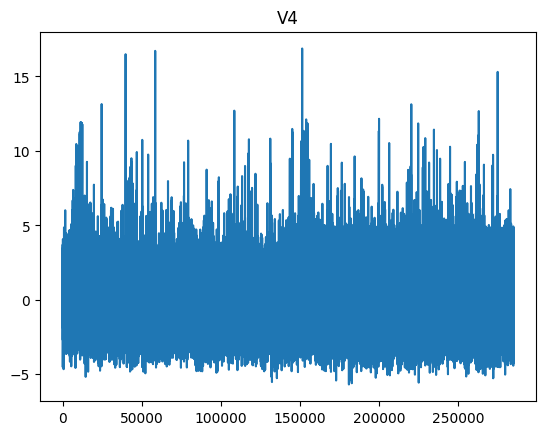

count    2.848070e+05
mean     2.074095e-15
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%      7.433413e-01
max      1.687534e+01
Name: V4, dtype: float64


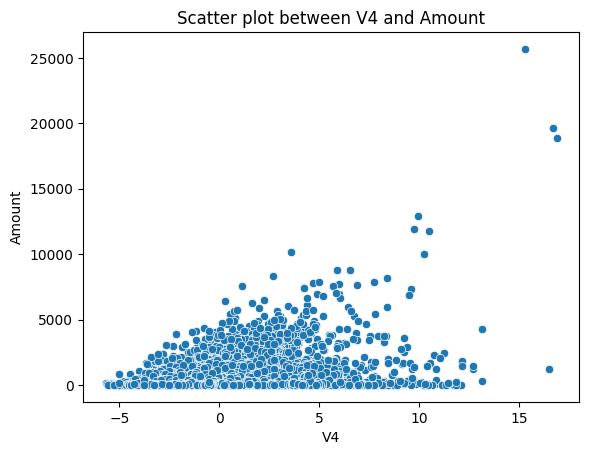

count    2.848070e+05
mean     2.074095e-15
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%      7.433413e-01
max      1.687534e+01
Name: V4, dtype: float64


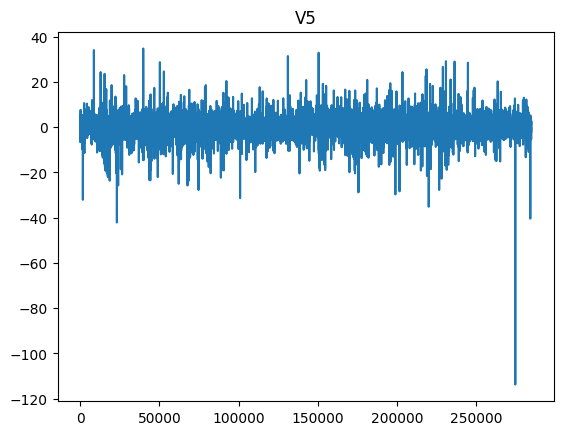

count    2.848070e+05
mean     9.604066e-16
std      1.380247e+00
min     -1.137433e+02
25%     -6.915971e-01
50%     -5.433583e-02
75%      6.119264e-01
max      3.480167e+01
Name: V5, dtype: float64


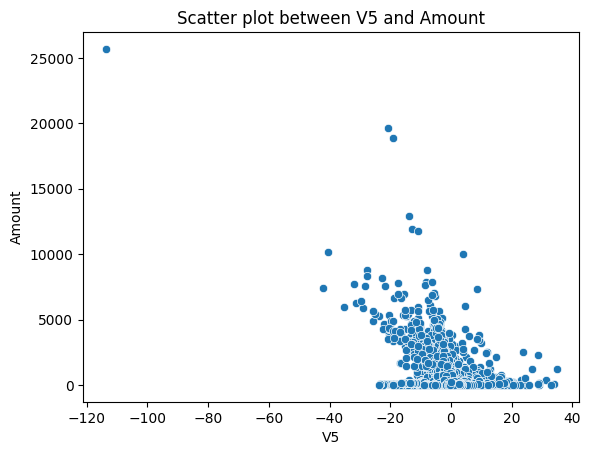

count    2.848070e+05
mean     9.604066e-16
std      1.380247e+00
min     -1.137433e+02
25%     -6.915971e-01
50%     -5.433583e-02
75%      6.119264e-01
max      3.480167e+01
Name: V5, dtype: float64


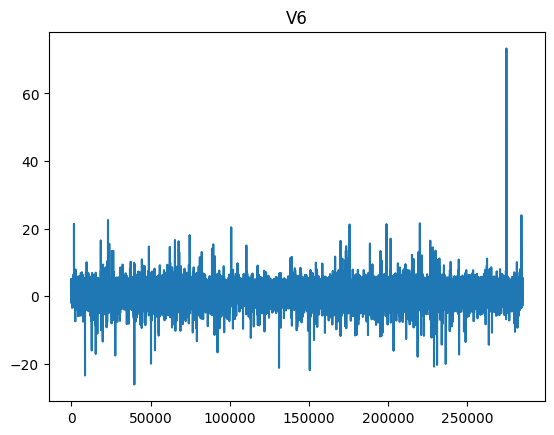

count    2.848070e+05
mean     1.487313e-15
std      1.332271e+00
min     -2.616051e+01
25%     -7.682956e-01
50%     -2.741871e-01
75%      3.985649e-01
max      7.330163e+01
Name: V6, dtype: float64


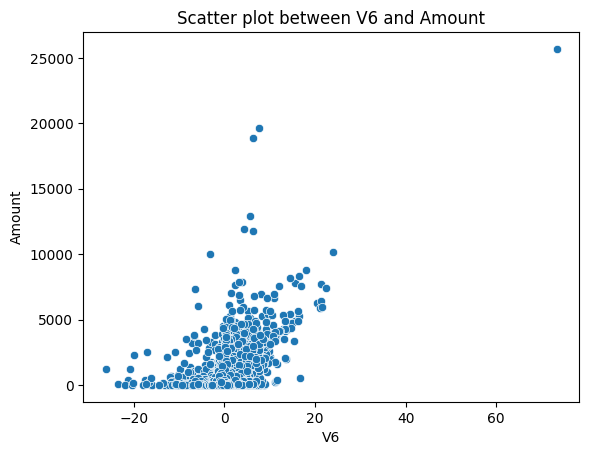

count    2.848070e+05
mean     1.487313e-15
std      1.332271e+00
min     -2.616051e+01
25%     -7.682956e-01
50%     -2.741871e-01
75%      3.985649e-01
max      7.330163e+01
Name: V6, dtype: float64


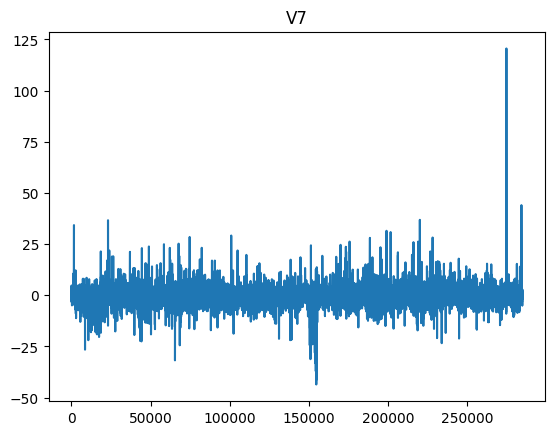

count    2.848070e+05
mean    -5.556467e-16
std      1.237094e+00
min     -4.355724e+01
25%     -5.540759e-01
50%      4.010308e-02
75%      5.704361e-01
max      1.205895e+02
Name: V7, dtype: float64


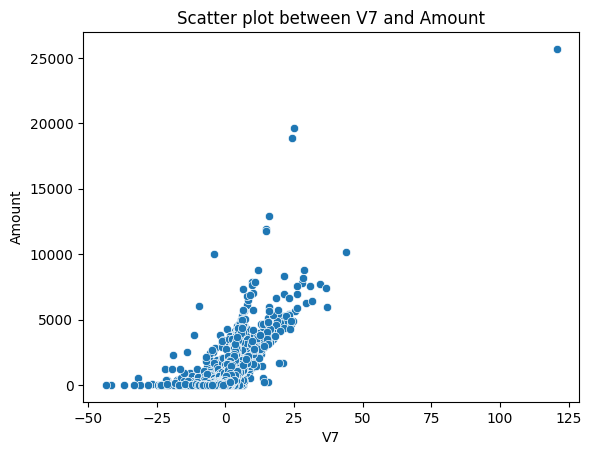

count    2.848070e+05
mean    -5.556467e-16
std      1.237094e+00
min     -4.355724e+01
25%     -5.540759e-01
50%      4.010308e-02
75%      5.704361e-01
max      1.205895e+02
Name: V7, dtype: float64


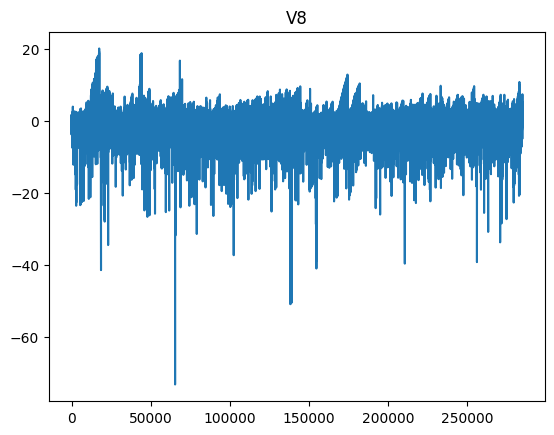

count    2.848070e+05
mean     1.213481e-16
std      1.194353e+00
min     -7.321672e+01
25%     -2.086297e-01
50%      2.235804e-02
75%      3.273459e-01
max      2.000721e+01
Name: V8, dtype: float64


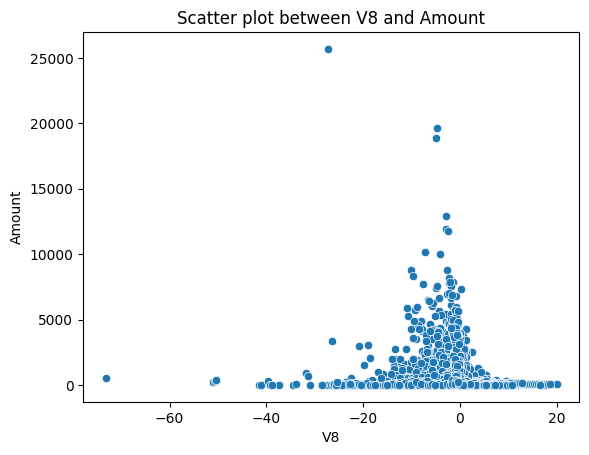

count    2.848070e+05
mean     1.213481e-16
std      1.194353e+00
min     -7.321672e+01
25%     -2.086297e-01
50%      2.235804e-02
75%      3.273459e-01
max      2.000721e+01
Name: V8, dtype: float64


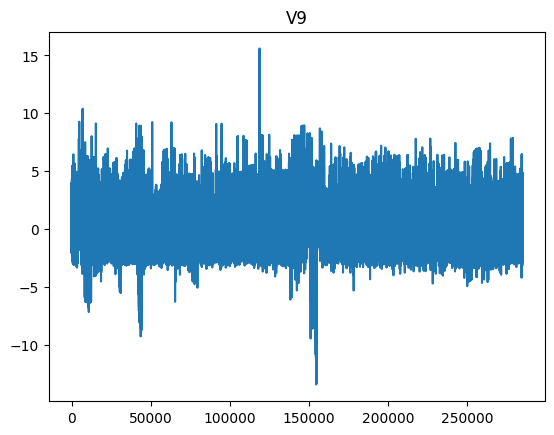

count    2.848070e+05
mean    -2.406331e-15
std      1.098632e+00
min     -1.343407e+01
25%     -6.430976e-01
50%     -5.142873e-02
75%      5.971390e-01
max      1.559499e+01
Name: V9, dtype: float64


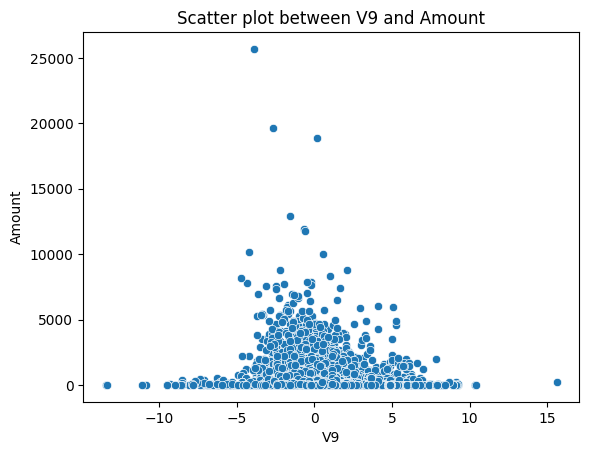

count    2.848070e+05
mean    -2.406331e-15
std      1.098632e+00
min     -1.343407e+01
25%     -6.430976e-01
50%     -5.142873e-02
75%      5.971390e-01
max      1.559499e+01
Name: V9, dtype: float64


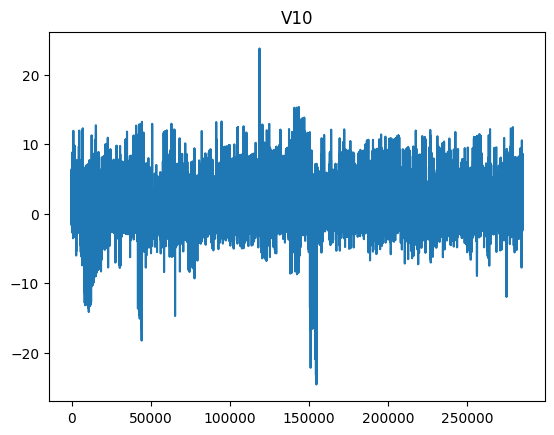

count    2.848070e+05
mean     2.239053e-15
std      1.088850e+00
min     -2.458826e+01
25%     -5.354257e-01
50%     -9.291738e-02
75%      4.539234e-01
max      2.374514e+01
Name: V10, dtype: float64


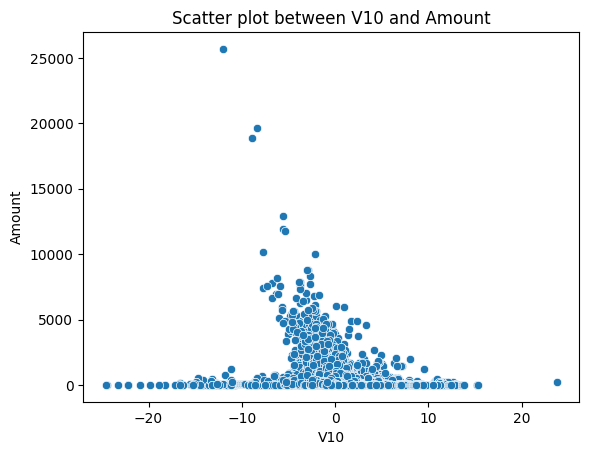

count    2.848070e+05
mean     2.239053e-15
std      1.088850e+00
min     -2.458826e+01
25%     -5.354257e-01
50%     -9.291738e-02
75%      4.539234e-01
max      2.374514e+01
Name: V10, dtype: float64


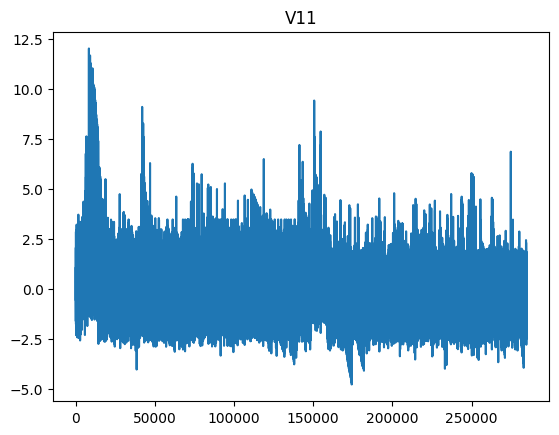

count    2.848070e+05
mean     1.673327e-15
std      1.020713e+00
min     -4.797473e+00
25%     -7.624942e-01
50%     -3.275735e-02
75%      7.395934e-01
max      1.201891e+01
Name: V11, dtype: float64


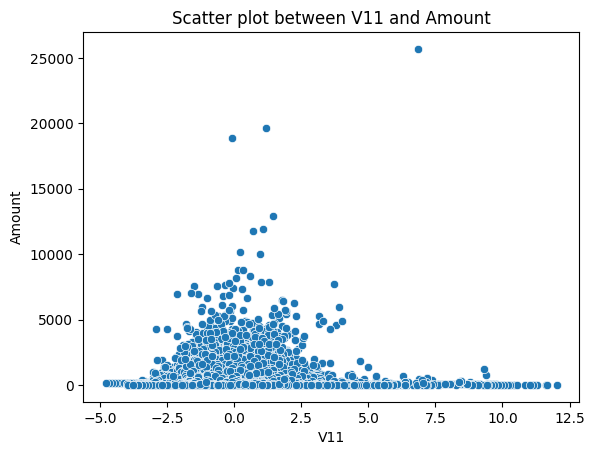

count    2.848070e+05
mean     1.673327e-15
std      1.020713e+00
min     -4.797473e+00
25%     -7.624942e-01
50%     -3.275735e-02
75%      7.395934e-01
max      1.201891e+01
Name: V11, dtype: float64


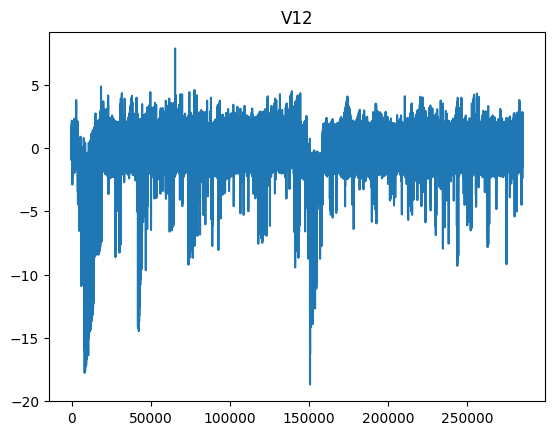

count    2.848070e+05
mean    -1.247012e-15
std      9.992014e-01
min     -1.868371e+01
25%     -4.055715e-01
50%      1.400326e-01
75%      6.182380e-01
max      7.848392e+00
Name: V12, dtype: float64


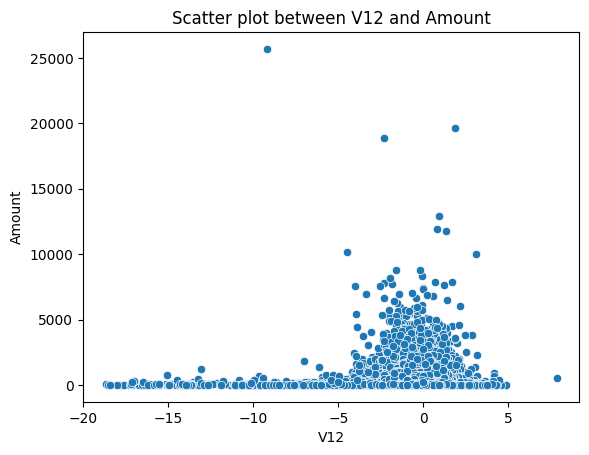

count    2.848070e+05
mean    -1.247012e-15
std      9.992014e-01
min     -1.868371e+01
25%     -4.055715e-01
50%      1.400326e-01
75%      6.182380e-01
max      7.848392e+00
Name: V12, dtype: float64


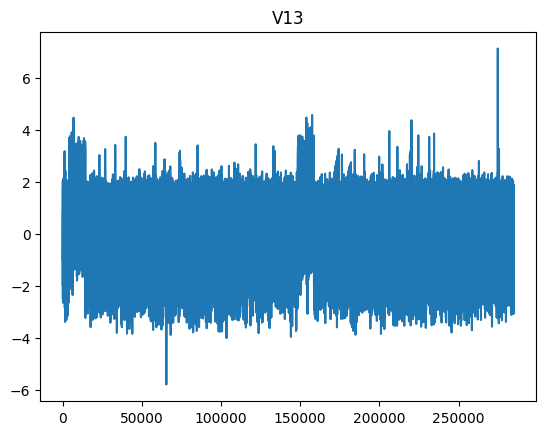

count    2.848070e+05
mean     8.190001e-16
std      9.952742e-01
min     -5.791881e+00
25%     -6.485393e-01
50%     -1.356806e-02
75%      6.625050e-01
max      7.126883e+00
Name: V13, dtype: float64


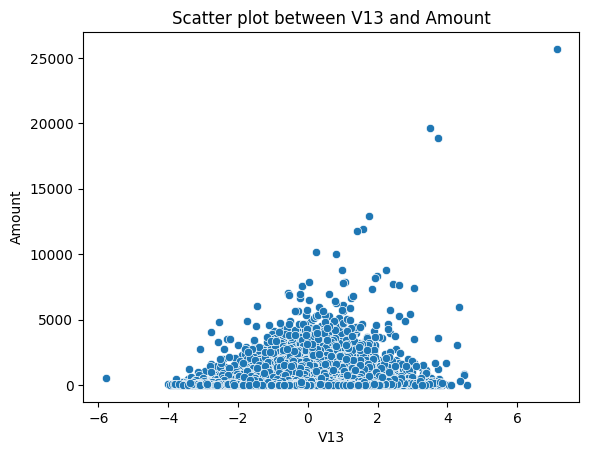

count    2.848070e+05
mean     8.190001e-16
std      9.952742e-01
min     -5.791881e+00
25%     -6.485393e-01
50%     -1.356806e-02
75%      6.625050e-01
max      7.126883e+00
Name: V13, dtype: float64


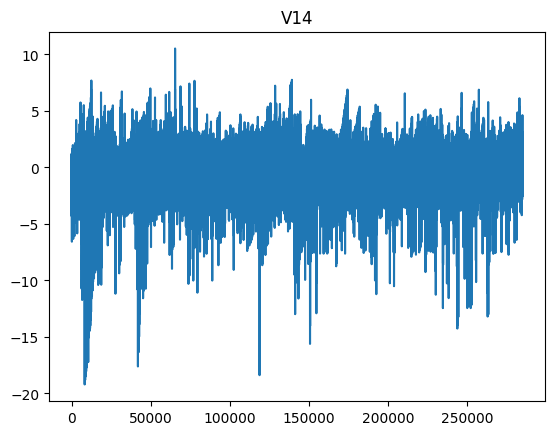

count    2.848070e+05
mean     1.207294e-15
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64


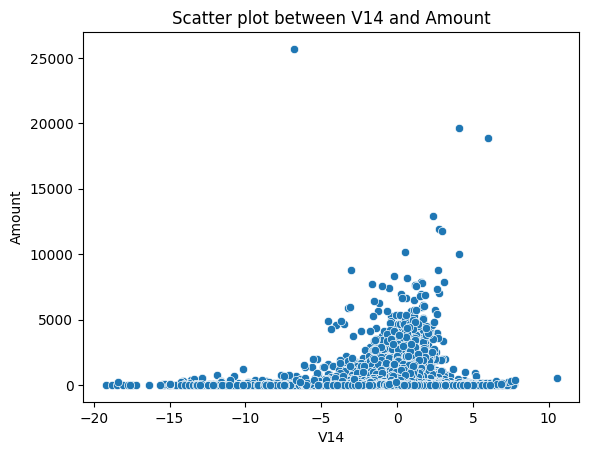

count    2.848070e+05
mean     1.207294e-15
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64


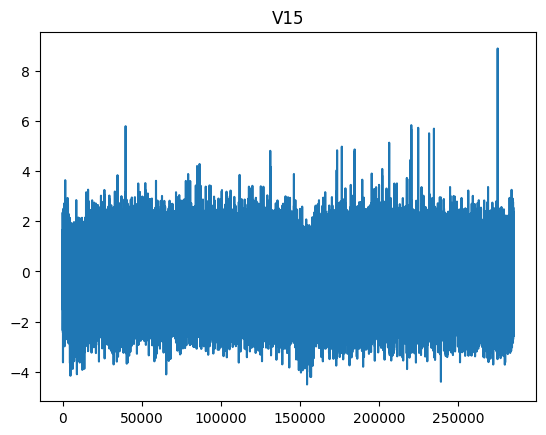

count    2.848070e+05
mean     4.887456e-15
std      9.153160e-01
min     -4.498945e+00
25%     -5.828843e-01
50%      4.807155e-02
75%      6.488208e-01
max      8.877742e+00
Name: V15, dtype: float64


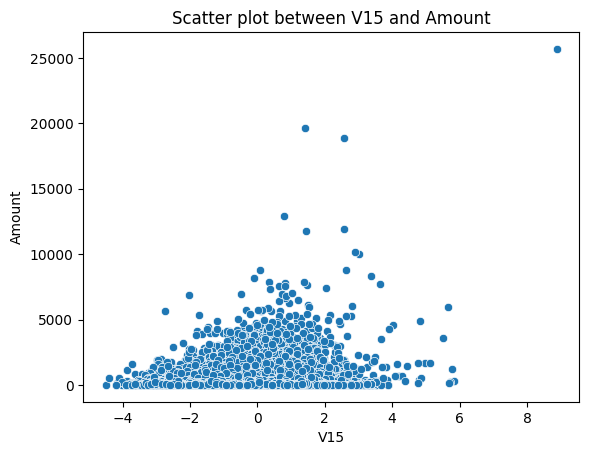

count    2.848070e+05
mean     4.887456e-15
std      9.153160e-01
min     -4.498945e+00
25%     -5.828843e-01
50%      4.807155e-02
75%      6.488208e-01
max      8.877742e+00
Name: V15, dtype: float64


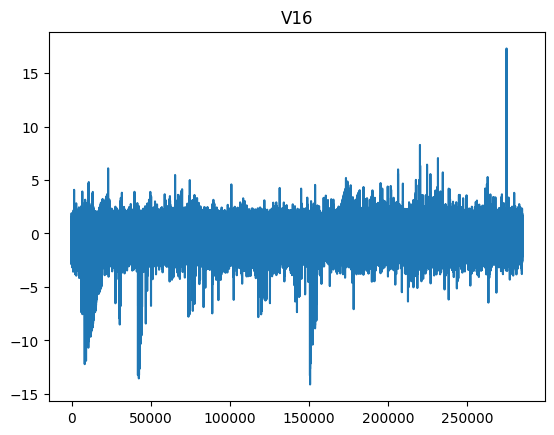

count    2.848070e+05
mean     1.437716e-15
std      8.762529e-01
min     -1.412985e+01
25%     -4.680368e-01
50%      6.641332e-02
75%      5.232963e-01
max      1.731511e+01
Name: V16, dtype: float64


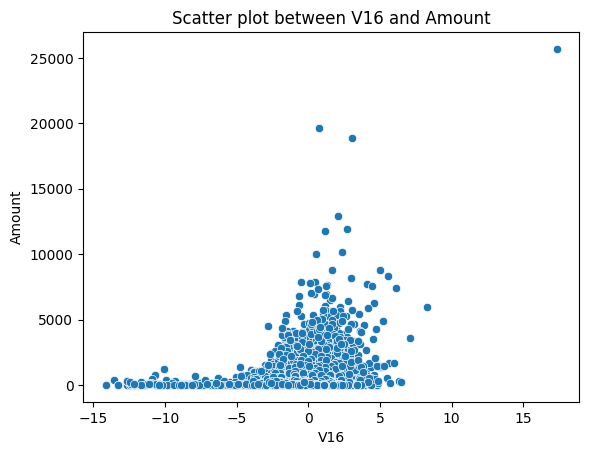

count    2.848070e+05
mean     1.437716e-15
std      8.762529e-01
min     -1.412985e+01
25%     -4.680368e-01
50%      6.641332e-02
75%      5.232963e-01
max      1.731511e+01
Name: V16, dtype: float64


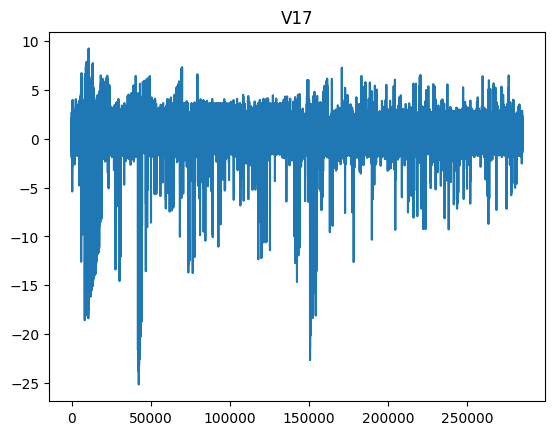

count    2.848070e+05
mean    -3.772171e-16
std      8.493371e-01
min     -2.516280e+01
25%     -4.837483e-01
50%     -6.567575e-02
75%      3.996750e-01
max      9.253526e+00
Name: V17, dtype: float64


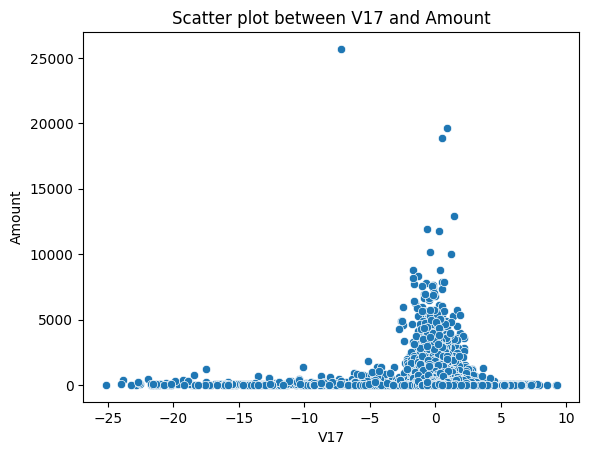

count    2.848070e+05
mean    -3.772171e-16
std      8.493371e-01
min     -2.516280e+01
25%     -4.837483e-01
50%     -6.567575e-02
75%      3.996750e-01
max      9.253526e+00
Name: V17, dtype: float64


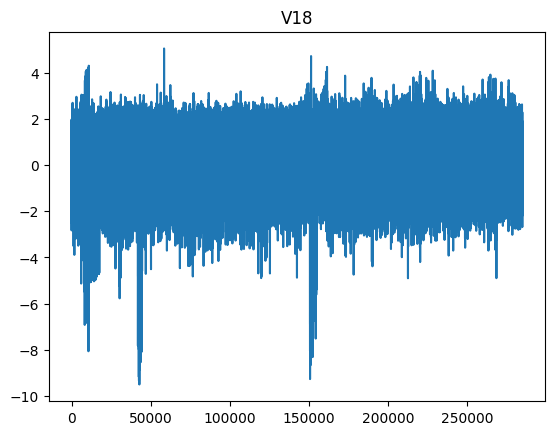

count    2.848070e+05
mean     9.564149e-16
std      8.381762e-01
min     -9.498746e+00
25%     -4.988498e-01
50%     -3.636312e-03
75%      5.008067e-01
max      5.041069e+00
Name: V18, dtype: float64


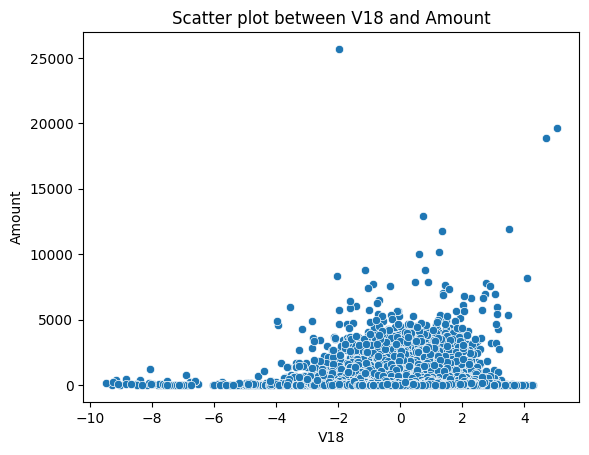

count    2.848070e+05
mean     9.564149e-16
std      8.381762e-01
min     -9.498746e+00
25%     -4.988498e-01
50%     -3.636312e-03
75%      5.008067e-01
max      5.041069e+00
Name: V18, dtype: float64


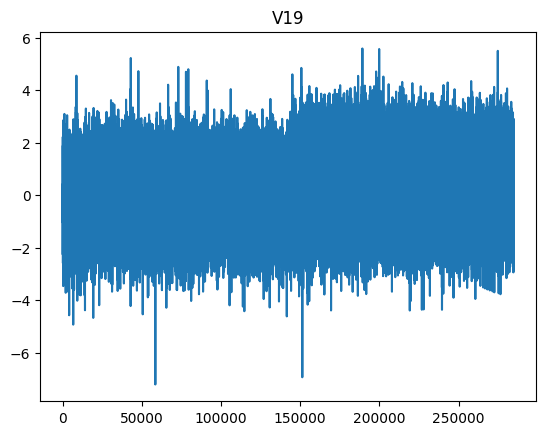

count    2.848070e+05
mean     1.039917e-15
std      8.140405e-01
min     -7.213527e+00
25%     -4.562989e-01
50%      3.734823e-03
75%      4.589494e-01
max      5.591971e+00
Name: V19, dtype: float64


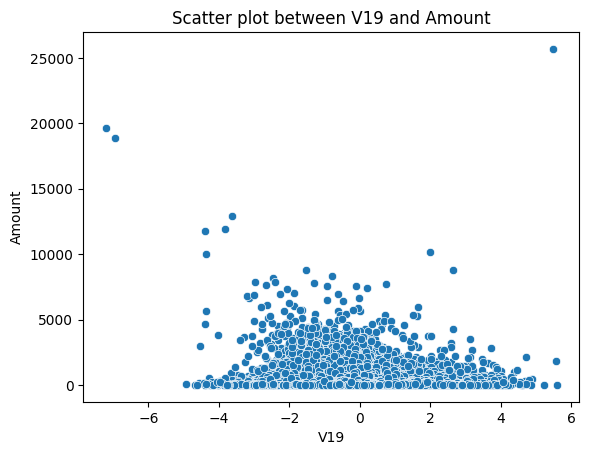

count    2.848070e+05
mean     1.039917e-15
std      8.140405e-01
min     -7.213527e+00
25%     -4.562989e-01
50%      3.734823e-03
75%      4.589494e-01
max      5.591971e+00
Name: V19, dtype: float64


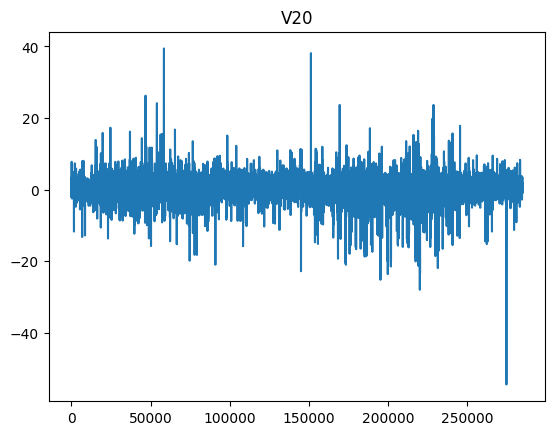

count    2.848070e+05
mean     6.406204e-16
std      7.709250e-01
min     -5.449772e+01
25%     -2.117214e-01
50%     -6.248109e-02
75%      1.330408e-01
max      3.942090e+01
Name: V20, dtype: float64


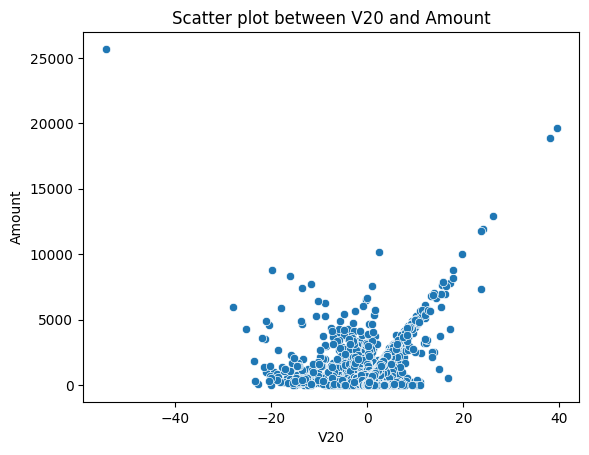

count    2.848070e+05
mean     6.406204e-16
std      7.709250e-01
min     -5.449772e+01
25%     -2.117214e-01
50%     -6.248109e-02
75%      1.330408e-01
max      3.942090e+01
Name: V20, dtype: float64


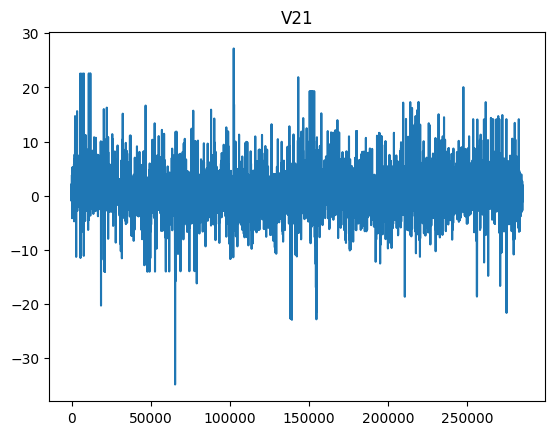

count    2.848070e+05
mean     1.654067e-16
std      7.345240e-01
min     -3.483038e+01
25%     -2.283949e-01
50%     -2.945017e-02
75%      1.863772e-01
max      2.720284e+01
Name: V21, dtype: float64


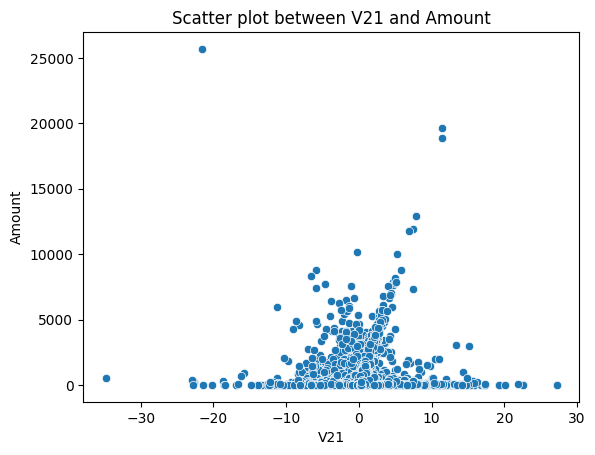

count    2.848070e+05
mean     1.654067e-16
std      7.345240e-01
min     -3.483038e+01
25%     -2.283949e-01
50%     -2.945017e-02
75%      1.863772e-01
max      2.720284e+01
Name: V21, dtype: float64


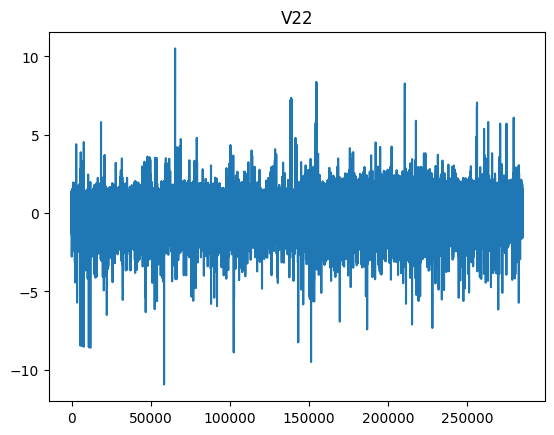

count    2.848070e+05
mean    -3.568593e-16
std      7.257016e-01
min     -1.093314e+01
25%     -5.423504e-01
50%      6.781943e-03
75%      5.285536e-01
max      1.050309e+01
Name: V22, dtype: float64


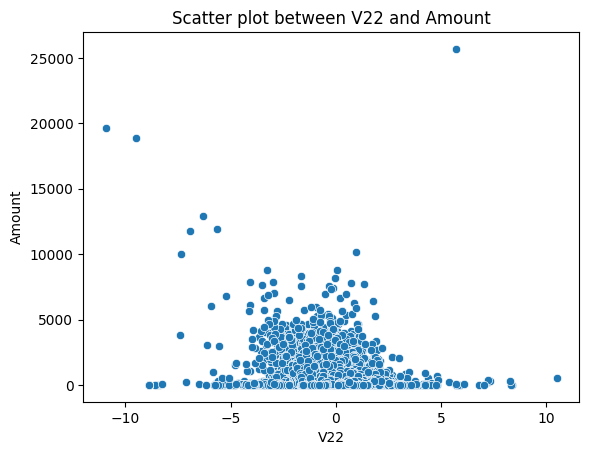

count    2.848070e+05
mean    -3.568593e-16
std      7.257016e-01
min     -1.093314e+01
25%     -5.423504e-01
50%      6.781943e-03
75%      5.285536e-01
max      1.050309e+01
Name: V22, dtype: float64


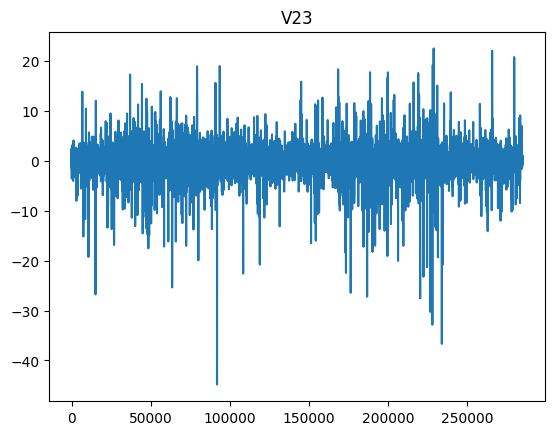

count    2.848070e+05
mean     2.578648e-16
std      6.244603e-01
min     -4.480774e+01
25%     -1.618463e-01
50%     -1.119293e-02
75%      1.476421e-01
max      2.252841e+01
Name: V23, dtype: float64


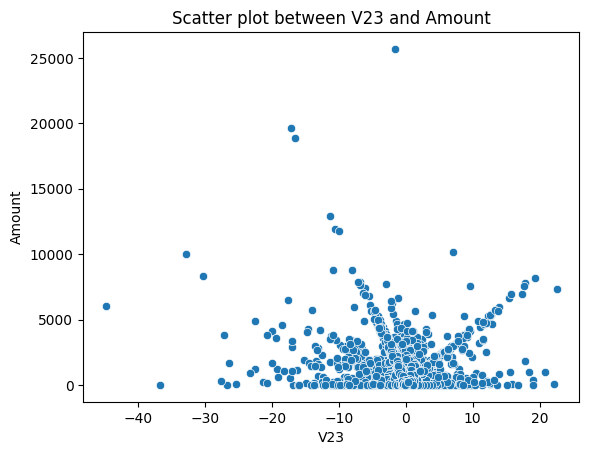

count    2.848070e+05
mean     2.578648e-16
std      6.244603e-01
min     -4.480774e+01
25%     -1.618463e-01
50%     -1.119293e-02
75%      1.476421e-01
max      2.252841e+01
Name: V23, dtype: float64


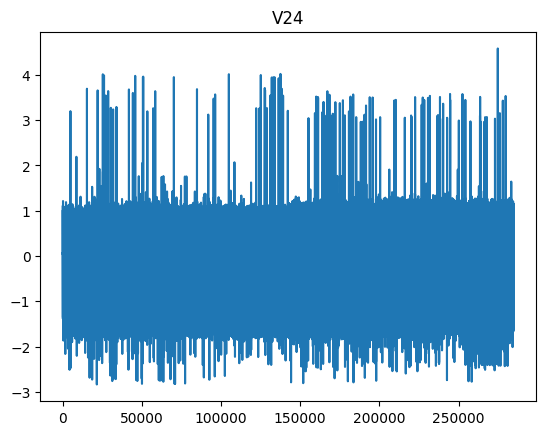

count    2.848070e+05
mean     4.473266e-15
std      6.056471e-01
min     -2.836627e+00
25%     -3.545861e-01
50%      4.097606e-02
75%      4.395266e-01
max      4.584549e+00
Name: V24, dtype: float64


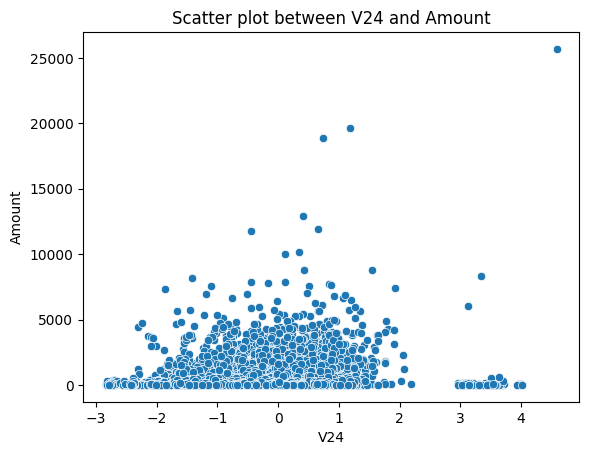

count    2.848070e+05
mean     4.473266e-15
std      6.056471e-01
min     -2.836627e+00
25%     -3.545861e-01
50%      4.097606e-02
75%      4.395266e-01
max      4.584549e+00
Name: V24, dtype: float64


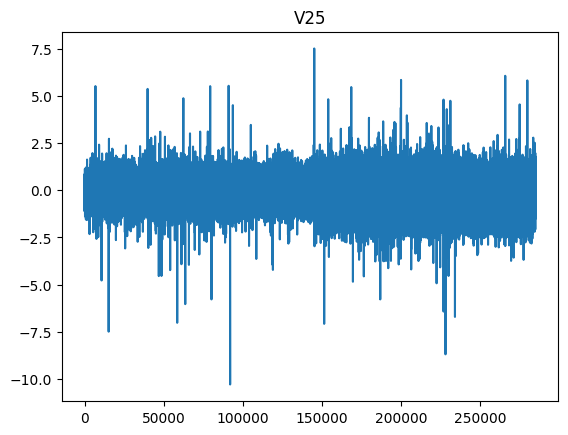

count    2.848070e+05
mean     5.340915e-16
std      5.212781e-01
min     -1.029540e+01
25%     -3.171451e-01
50%      1.659350e-02
75%      3.507156e-01
max      7.519589e+00
Name: V25, dtype: float64


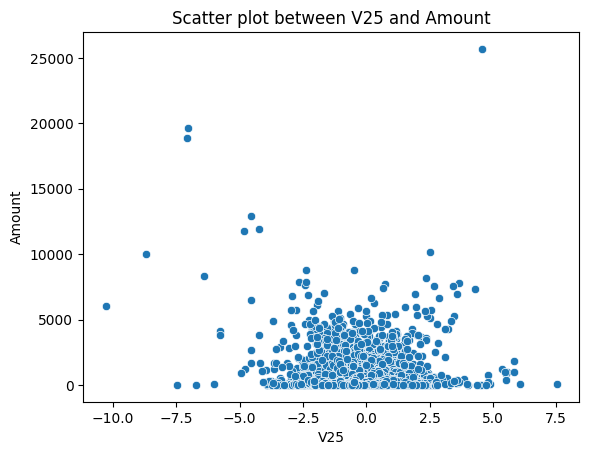

count    2.848070e+05
mean     5.340915e-16
std      5.212781e-01
min     -1.029540e+01
25%     -3.171451e-01
50%      1.659350e-02
75%      3.507156e-01
max      7.519589e+00
Name: V25, dtype: float64


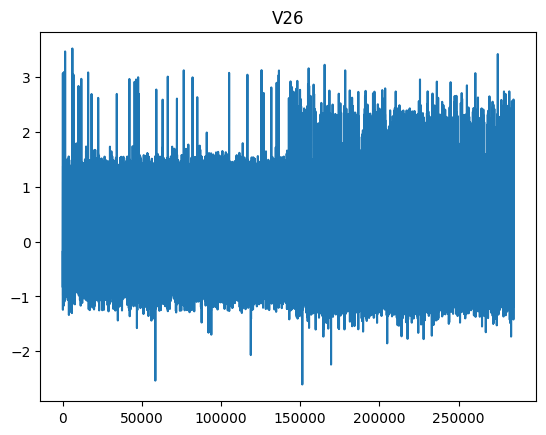

count    2.848070e+05
mean     1.683437e-15
std      4.822270e-01
min     -2.604551e+00
25%     -3.269839e-01
50%     -5.213911e-02
75%      2.409522e-01
max      3.517346e+00
Name: V26, dtype: float64


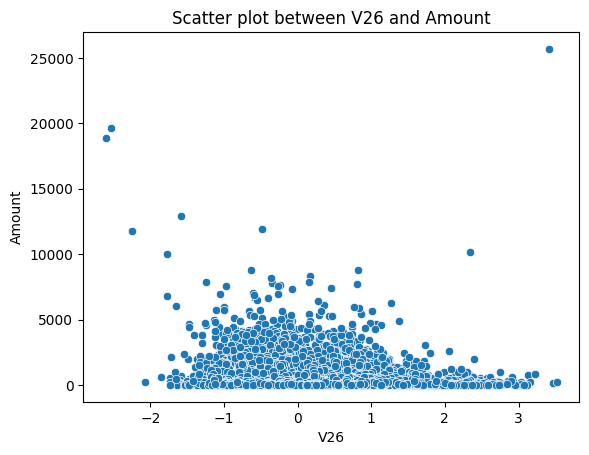

count    2.848070e+05
mean     1.683437e-15
std      4.822270e-01
min     -2.604551e+00
25%     -3.269839e-01
50%     -5.213911e-02
75%      2.409522e-01
max      3.517346e+00
Name: V26, dtype: float64


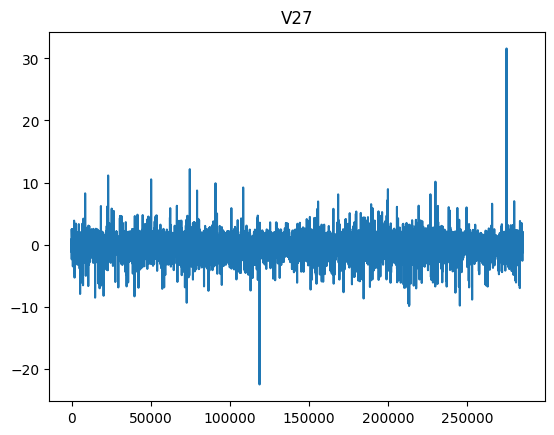

count    2.848070e+05
mean    -3.660091e-16
std      4.036325e-01
min     -2.256568e+01
25%     -7.083953e-02
50%      1.342146e-03
75%      9.104512e-02
max      3.161220e+01
Name: V27, dtype: float64


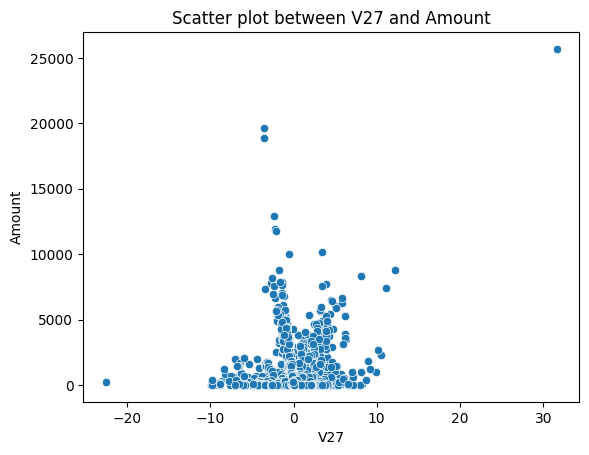

count    2.848070e+05
mean    -3.660091e-16
std      4.036325e-01
min     -2.256568e+01
25%     -7.083953e-02
50%      1.342146e-03
75%      9.104512e-02
max      3.161220e+01
Name: V27, dtype: float64


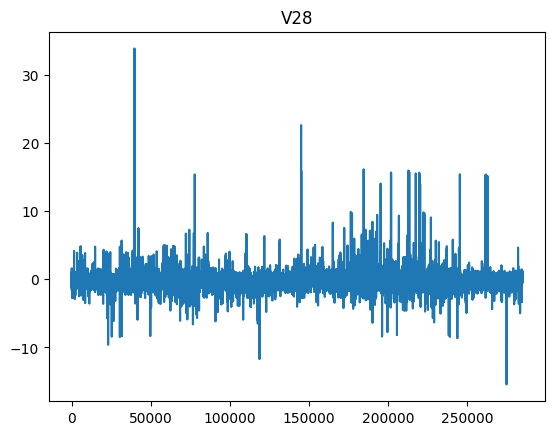

count    2.848070e+05
mean    -1.227390e-16
std      3.300833e-01
min     -1.543008e+01
25%     -5.295979e-02
50%      1.124383e-02
75%      7.827995e-02
max      3.384781e+01
Name: V28, dtype: float64


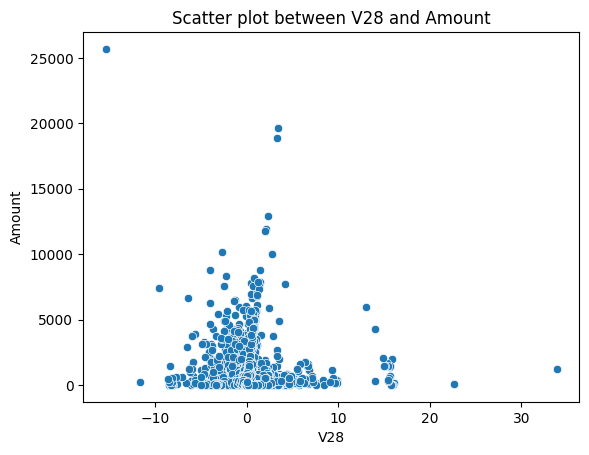

count    2.848070e+05
mean    -1.227390e-16
std      3.300833e-01
min     -1.543008e+01
25%     -5.295979e-02
50%      1.124383e-02
75%      7.827995e-02
max      3.384781e+01
Name: V28, dtype: float64


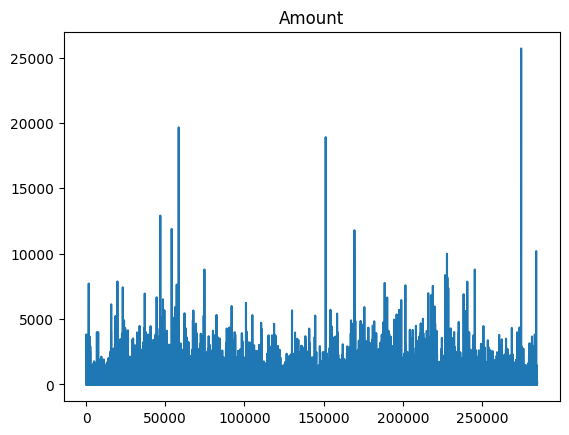

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


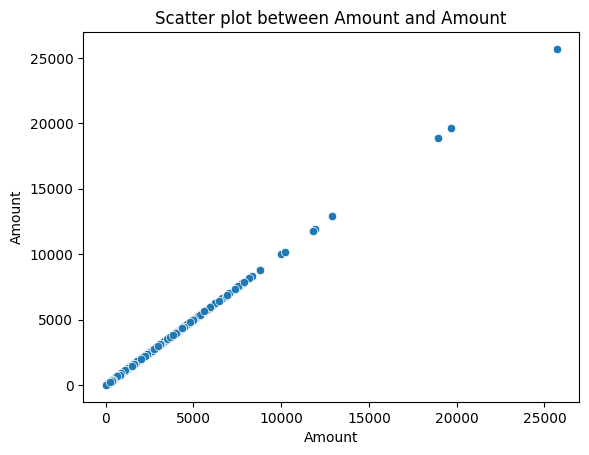

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


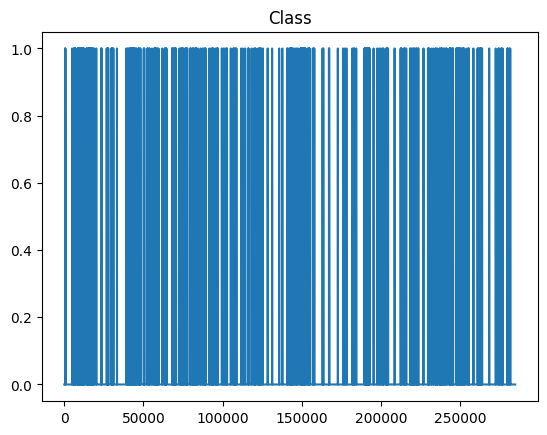

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


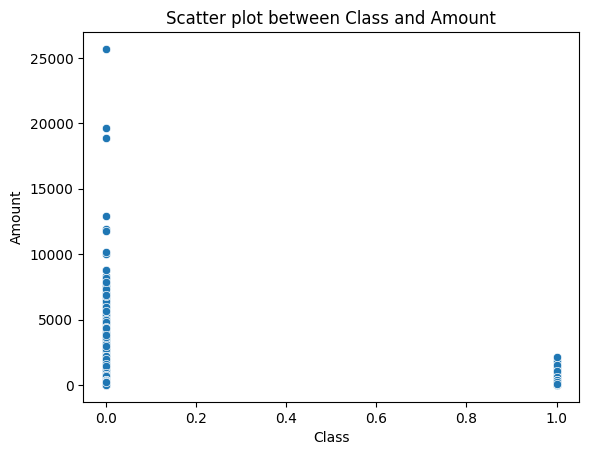

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


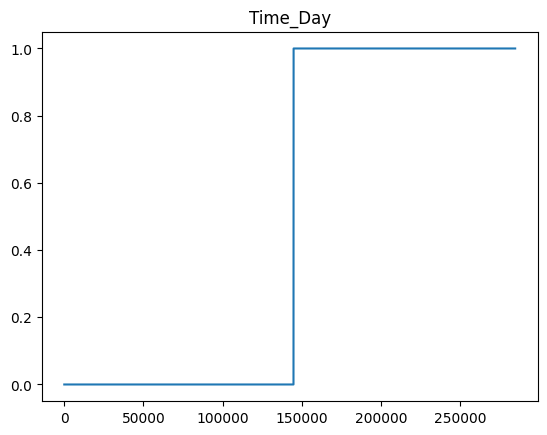

count    284807.000000
mean          0.491635
std           0.499931
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Time_Day, dtype: float64


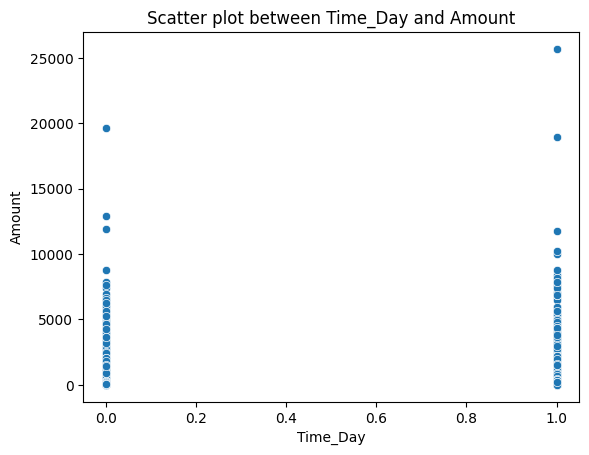

count    284807.000000
mean          0.491635
std           0.499931
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Time_Day, dtype: float64


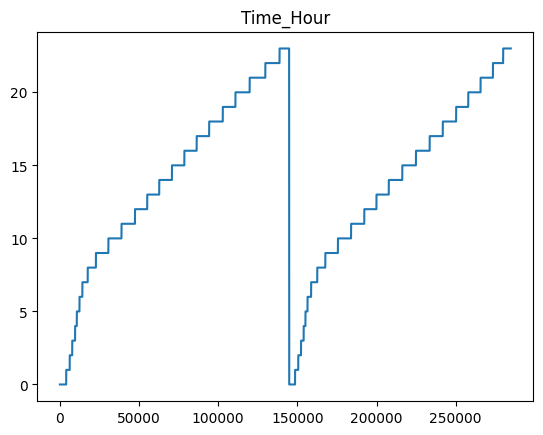

count    284807.000000
mean         14.046470
std           5.835854
min           0.000000
25%          10.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: Time_Hour, dtype: float64


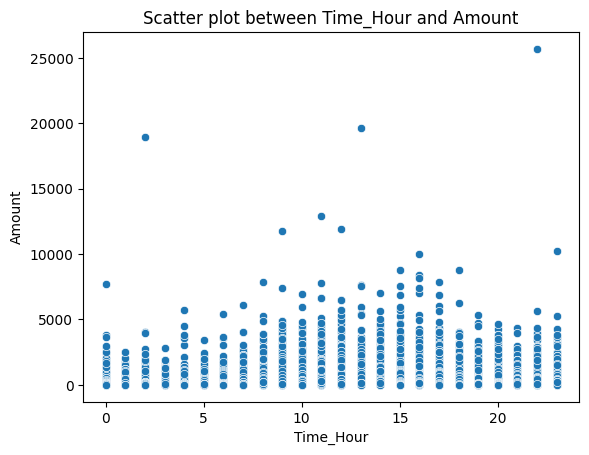

count    284807.000000
mean         14.046470
std           5.835854
min           0.000000
25%          10.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: Time_Hour, dtype: float64


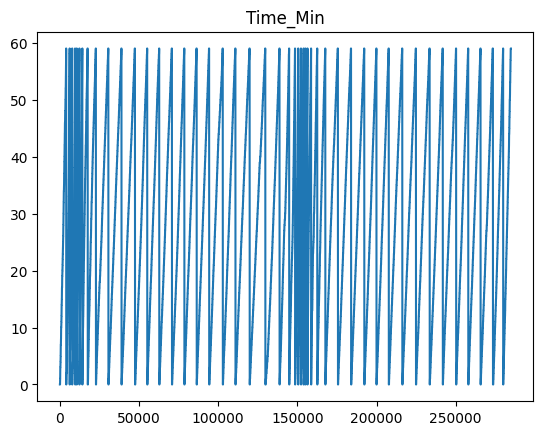

count    284807.000000
mean         28.997044
std          17.427849
min           0.000000
25%          14.000000
50%          29.000000
75%          44.000000
max          59.000000
Name: Time_Min, dtype: float64


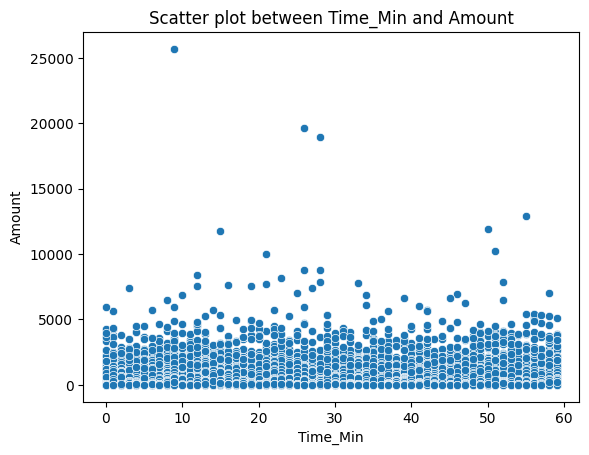

count    284807.000000
mean         28.997044
std          17.427849
min           0.000000
25%          14.000000
50%          29.000000
75%          44.000000
max          59.000000
Name: Time_Min, dtype: float64


In [ ]:
for i in data.columns:
  plt.plot(data[i])
  plt.title(i)
  plt.show()
  print(data[i].describe())
  sns.scatterplot(x = i,y = "Amount",data = data)
  plt.title(f"Scatter plot between {i} and Amount")
  plt.show()
  print(data[i].describe())


In [ ]:
from imblearn.over_sampling import SMOTE

X = data.drop('Class', axis=1)
y = data['Class']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[85125    24]
 [    0 85440]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)




Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.964 total time=   1.1s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.964 total time=   1.1s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.963 total time=   1.1s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.967 total time=   1.9s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.968 total time=   1.5s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.968 total time=   1.9s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.970 total time=   2.7s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.970 total time=   2.6s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.970 total time=   2.4s
[CV 1/3] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.97

In [ ]:
final_model = XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=300, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train, y_train)

final_predictions = final_model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, final_predictions))
print(classification_report(y_test, final_predictions))
print(accuracy_score(y_test, final_predictions))

[[42627    10]
 [    0 42658]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42637
           1       1.00      1.00      1.00     42658

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295

0.9998827598335189


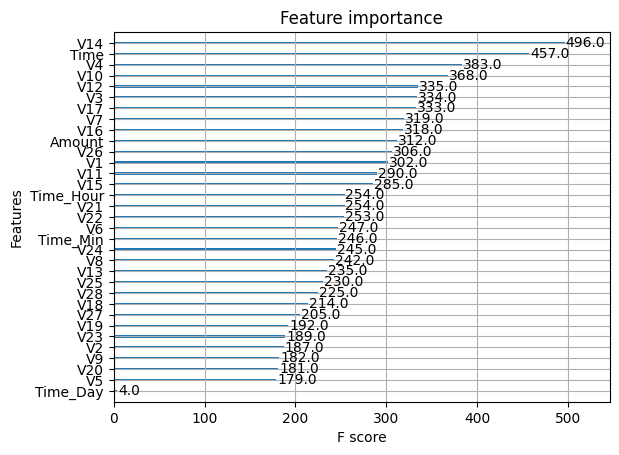

In [ ]:
from xgboost import plot_importance
plot_importance(final_model)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

model_cv = XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=300, use_label_encoder=False, eval_metric='logloss')
scores = cross_val_score(model_cv, X_res, y_res, cv=10, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.97954733 0.99956035 0.99855794 0.99956035 0.99980655 0.99365141
 0.99970104 0.99975379 0.99943724 0.97457046]
Average cross-validation score: 0.9944146457274501


In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X_res, y_res, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

model_final = XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=300, use_label_encoder=False, eval_metric='logloss')
model_final.fit(X_train, y_train)

y_val_pred = model_final.predict(X_val)
y_val_proba = model_final.predict_proba(X_val)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation ROC-AUC:", roc_auc_score(y_val, y_val_proba))


Validation Accuracy: 0.9999172425207928
Validation ROC-AUC: 0.999993301491958


In [ ]:
y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.9998827598335189
Test ROC-AUC: 0.9999929258657907
Confusion Matrix:
 [[42627    10]
 [    0 42658]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42637
           1       1.00      1.00      1.00     42658

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=final_model, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

print("Feature Ranking:", rfe.ranking_)


Feature Ranking: [ 1  1 14  1  1 21 20  5  1  6  1  1  1  3  1 12  7  1  9  8 18 13 15 10
 22 17 11 23 19  4 24  2 16]
